In [2]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn
import pandas as pd
import matplotlib

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
     
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/' 
Ftm = '/Volumes/Dominic Time Machine/'

## Avalanches


In [5]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*')) 
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy']

In [27]:
10**3.3

1995.2623149688789

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

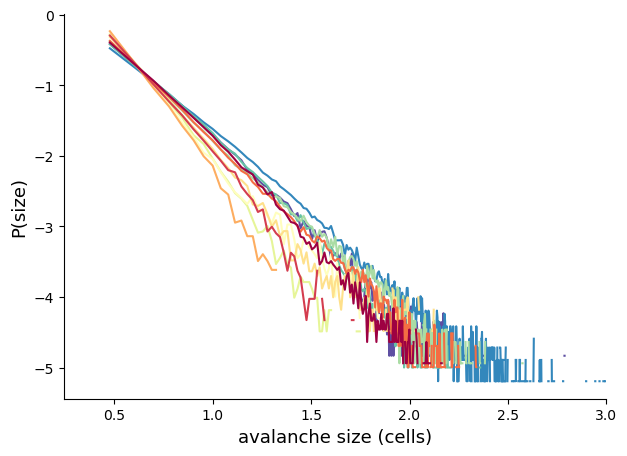

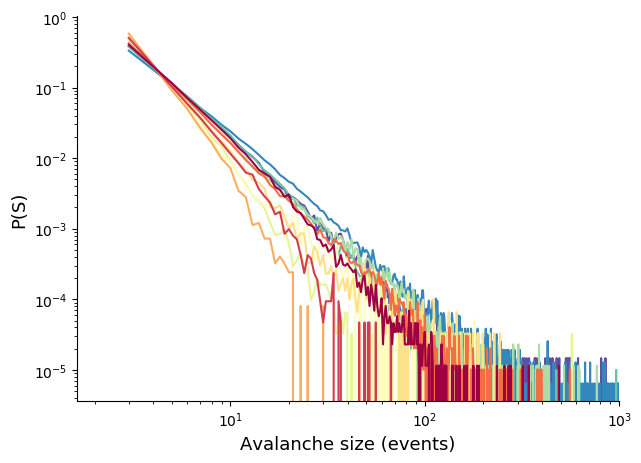

In [52]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']

colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[i])
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 3)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
plt.xlim(right = 1000)  
axarr.set_xticklabels(labels)
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)

plt.savefig(Ffig + 'av_size_axes.svg', transparent = True)
plt.show()


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

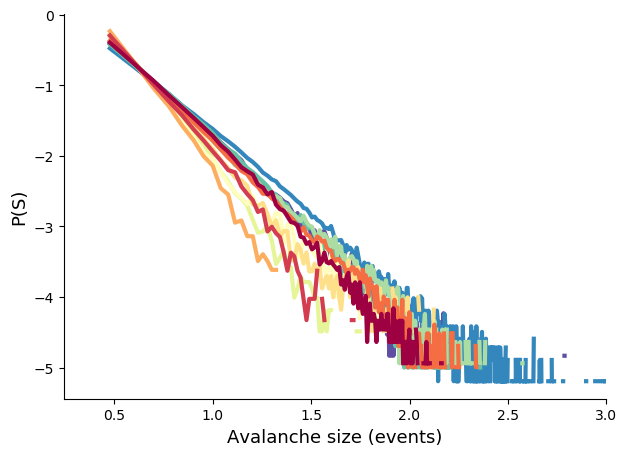

In [53]:
import matplotlib
from matplotlib import cm

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 3, markersize = 1, alpha = 1, c = colors[i])
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 3)  
plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

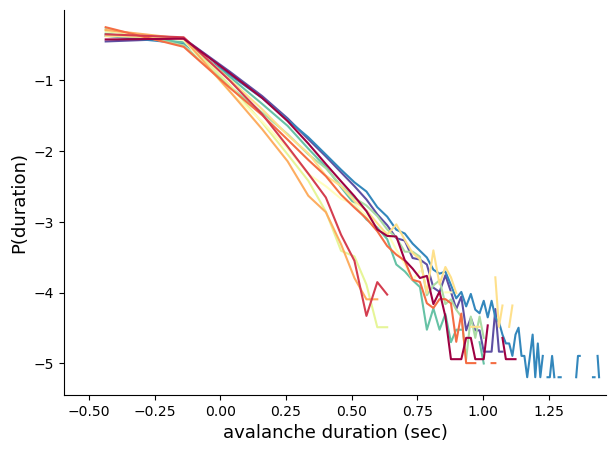

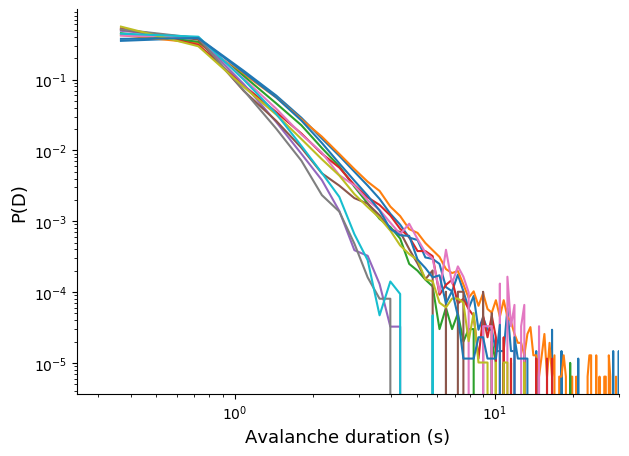

In [54]:
fig, axarr = plt.subplots(figsize = (7,5))
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

axarr.set_prop_cycle('color', colors)
sns.reset_orig()
labels = ['10$^1$','10$^1$','10$^0$','10$^1$']

binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 1.47)  
plt.show()


fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 30)  
axarr.set_ylabel('P(D)', size = '13')
axarr.set_xlabel('Avalanche duration (s)', size = '13')
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'av_dur_axes.svg', transparent = True)

plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

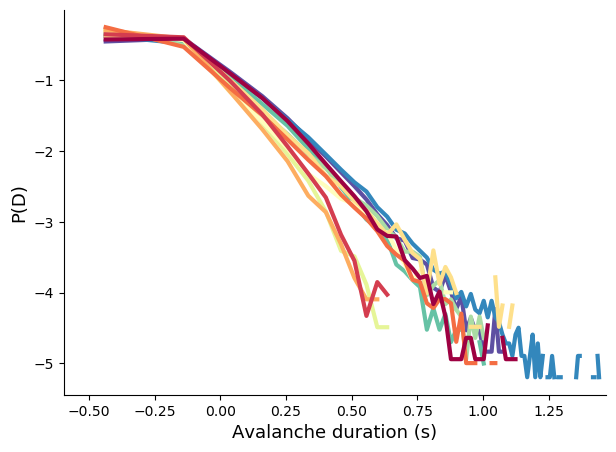

In [55]:
import matplotlib
from matplotlib import cm
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 3, markersize = 1, alpha = 1, c = colors[i])
axarr.set_ylabel('P(D)', size = '13')
axarr.set_xlabel('Avalanche duration (s)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 1.47)  
plt.savefig(Ffig + 'av_dur.svg', transparent = True)
plt.show()



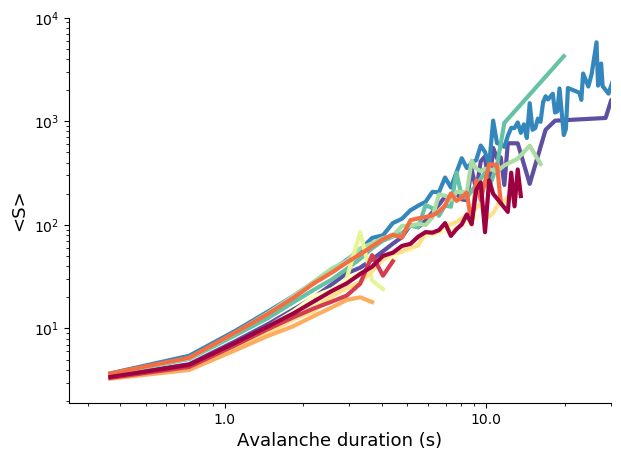

In [56]:
fig, axarr = plt.subplots(figsize = (7,5))
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 3, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '13')
axarr.set_ylabel('<S>', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 30)  
plt.ylim(top = 10000)  

plt.savefig(Ffig + 'av_sizexdur.svg', transparent = True)
plt.show()

## DCC 


In [58]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
bln_dcc = sorted(glob.glob('*BLN*DCC.npy*')) 
foc_dcc = sorted(glob.glob('*_PTZ05*DCC.npy*')) 
gen_dcc = sorted(glob.glob('*_PTZ20*DCC.npy*')) 
bln_dcc

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-DCC.npy']

In [ ]:
for i in range(len(av_list)):
    curr_av = np.load(av_list)
    dcc = crfn.DCC(curr_av)

In [61]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
bln_dcc = sorted(glob.glob('*BLN*DCC.npy*')) 
swap_dcc = sorted(glob.glob('*DCC*swap*')) 
bln_dcc,swap_dcc

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-DCC.npy'],
 ['null_DCC-swap.npy'])

In [75]:
len(dcc_comb)

22

In [76]:
len(plot_comb)

11

In [79]:
dcc = np.zeros((11))
lab =list(range(11))

dcc_list = [bln_dcc]
plot_comb, col_comb = [],[]

count=0
for i in range(len(dcc_list)):
    for y in range(11):
        dcc[count] = np.load(dcc_list[i][y] ,allow_pickle=True)
        lab[count] = 'empirical'
        plot_comb = np.append(plot_comb, 1)
        col_comb = np.append(col_comb, y+1)
        count+=1


null_list = np.load(swap_dcc[0])
name_list = 'spatial'

dcc_comb = dcc
lab_comb = lab
count=1
for i in range(len(null_list)):
    dcc_comb = np.append(dcc_comb, null_list[i])
    lab_comb = np.append(lab_comb,name_list)
    plot_comb = np.append(plot_comb, 1)
    col_comb = np.append(col_comb, 0)


null_df = pd.DataFrame({"dcc":dcc_comb , "Labels": lab_comb, 'Plot': plot_comb.astype(int), 'Col': col_comb.astype(int)})

In [81]:
null_df

,dcc,Labels,Plot,Col
0,0.207472,empirical,1,1
1,0.135406,empirical,1,2
2,0.201852,empirical,1,3
3,0.091520,empirical,1,4
4,0.142556,empirical,1,5
5,0.001309,empirical,1,6
6,0.113562,empirical,1,7
7,0.353099,empirical,1,8
8,0.016977,empirical,1,9
9,0.190581,empirical,1,10


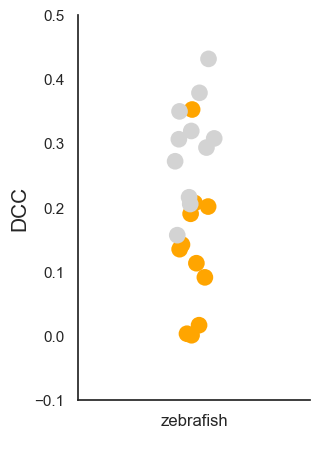

In [89]:
import matplotlib 
import seaborn as sns
colors = ['orange','lightgrey', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="Plot", y="dcc", data=null_df, hue = 'Labels', palette = colors, size = 12, jitter = True)

#plt.hlines(0.3, -0.15 ,0.15, linestyle = '--', color = 'grey')
ax.set_ylabel('DCC', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
plt.ylim(bottom = -0.1, top = 0.5)  
ax.legend_.remove()
plt.savefig('DCC_baseline.svg', transparent = True)
plt.show()

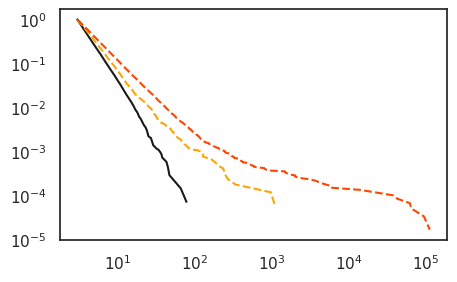

In [113]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_svec = []
pre_svec = []
p20_svec = []
for i in range(len(bln_distlist)):
    bln_svec = np.append(bln_svec, bln_distlist[i])
    pre_svec = np.append(pre_svec, pre_distlist[i])
    p20_svec = np.append(p20_svec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_svec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_svec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_svec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

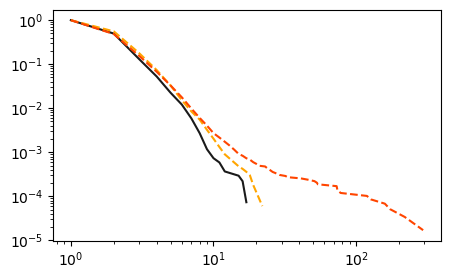

In [114]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 1
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_dvec = []
pre_dvec = []
p20_dvec = []
for i in range(len(bln_distlist)):
    bln_dvec = np.append(bln_dvec, bln_distlist[i])
    pre_dvec = np.append(pre_dvec, pre_distlist[i])
    p20_dvec = np.append(p20_dvec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_dvec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_dvec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_dvec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

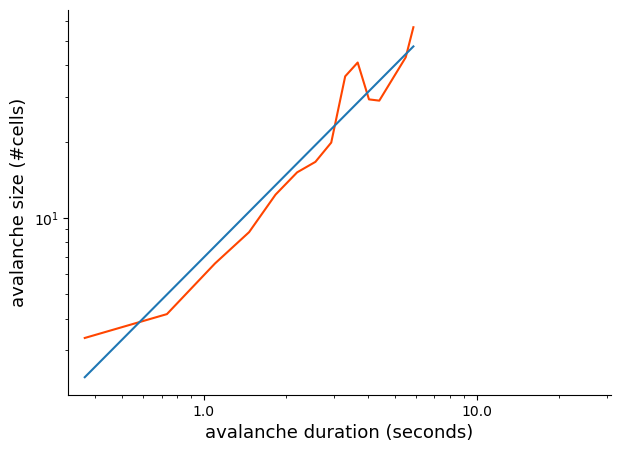

In [117]:
sizelist, durlist = list(range(3)),list(range(3))
fit = list(range(3))


avsize = bln_svec
avdur = (1/2.73)*bln_dvec
sizevec, durvec = [],[]
for e in np.unique(avdur):
    sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
    durvec = np.append(durvec, e)

fig, axarr = plt.subplots(figsize = (7,5))
xaxis = np.unique(durvec)
yaxis = sizevec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
bln_fit = m

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('avalanche duration (seconds)', size = '13')
axarr.set_ylabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()


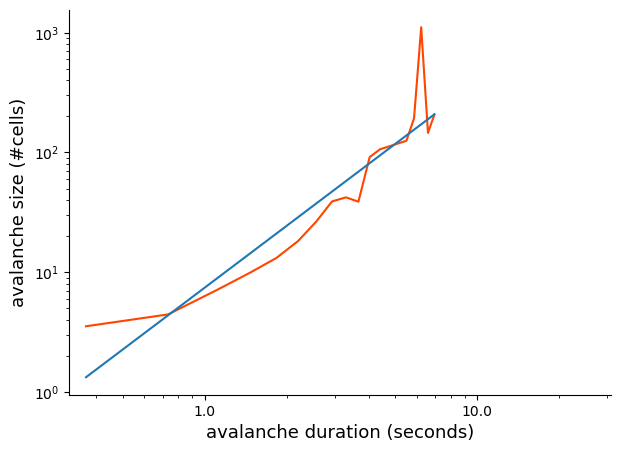

In [118]:
sizelist, durlist = list(range(3)),list(range(3))
fit = list(range(3))


avsize = pre_svec
avdur = (1/2.73)*pre_dvec
sizevec, durvec = [],[]
for e in np.unique(avdur):
    sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
    durvec = np.append(durvec, e)

fig, axarr = plt.subplots(figsize = (7,5))
xaxis = np.unique(durvec)
yaxis = sizevec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
pre_fit = m

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('avalanche duration (seconds)', size = '13')
axarr.set_ylabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()


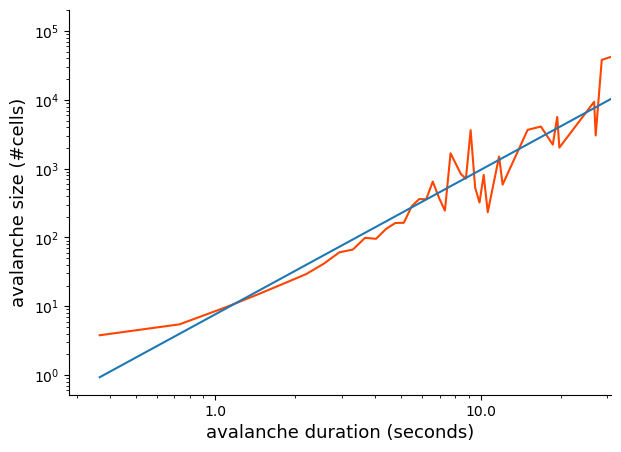

In [119]:
sizelist, durlist = list(range(3)),list(range(3))
fit = list(range(3))


avsize = p20_svec
avdur = (1/2.73)*p20_dvec
sizevec, durvec = [],[]
for e in np.unique(avdur):
    sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
    durvec = np.append(durvec, e)

fig, axarr = plt.subplots(figsize = (7,5))
xaxis = np.unique(durvec)
yaxis = sizevec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
p20_fit = m

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('avalanche duration (seconds)', size = '13')
axarr.set_ylabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()

In [121]:
def do_s(sizes):
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=isfn.IS_LN(npart, sizes, M, a, b)
    po=isfn.IS(npart, sizes, M, a, b)
    LLR = po[1] - ln[2]
    exp = po[0]
    return(LLR, exp)
def do_d(sizes):
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=isfn.IS_LN(npart, sizes, M, a, b)
    po=isfn.IS(npart, sizes, M, a, b)
    LLR = po[1] - ln[2]
    exp = po[0]
    return(LLR, exp)

In [125]:
bln_pred = []
bln_pred = DCC(3.8390065504857813, 3.380415180033332)
bln_diff = abs(bln_fit - bln_pred)
bln_diff

0.10879647774750123

In [127]:
pre_pred = []
pre_pred = DCC(3.520377470929301, 2.9621960843207904)
pre_diff = abs(pre_fit - pre_pred)
pre_diff

0.42990731338765587

In [129]:
p20_pred = []
p20_pred = DCC(3.4848060443307256, 2.5856900459660506)
p20_diff = abs(p20_fit - p20_pred)
p20_diff

0.5326538213634446

In [122]:
do_s(bln_svec), do_d(bln_dvec)

((4450.367216832339, 3.380415180033332),
 (6796.754446933861, 3.8390065504857813))

In [126]:
do_s(pre_svec), do_d(pre_dvec)

((5886.284904015538, 2.9621960843207904),
 (8132.900678882914, 3.5203774709293016))

In [128]:
do_s(p20_svec), do_d(p20_dvec)

((22645.456785564616, 2.5856900459660506),
 (26751.611038085855, 3.4848060443307256))

In [ ]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)


for i in range(len(sizelist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
    y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
    bln_fit[i] = m

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.set_ylabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.xlim(right = 31)  
    plt.show()


In [82]:
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))
blnlist, prelist, p20list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-09_2pho

In [ ]:
def do_s(sizes):
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=isfn.IS_LN(npart, sizes, M, a, b)
    po=isfn.IS(npart, sizes, M, a, b)
    LLR = po[1] - ln[2]
    exp = po[0]
    return(LLR, exp)
def do_d(sizes):
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=isfn.IS_LN(npart, sizes, M, a, b)
    po=isfn.IS(npart, sizes, M, a, b)
    LLR = po[1] - ln[2]
    exp = po[0]
    return(LLR, exp)

In [83]:
blnsize_exp_list = list(range(len(blnlist)))
blnsize_llr_list = list(range(len(blnlist)))
for i in range(len(blnlist)):
    data = np.load(blnlist[0])
    out = do_s(data[0])
    blnsize_exp_list[i] = out[1]
    blnsize_llr_list[i] = out[0]
    
presize_exp_list = list(range(len(prelist)))
presize_llr_list = list(range(len(prelist)))
for i in range(len(prelist)):
    data = np.load(prelist[0])
    out = do_s(data[0])
    presize_exp_list[i] = out[1]
    presize_llr_list[i] = out[0]

p20size_exp_list = list(range(len(p20list)))
p20size_llr_list = list(range(len(p20list)))
for i in range(len(p20list)):
    data = np.load(p20list[0])
    out = do_s(data[0])
    p20size_exp_list[i] = out[1]
    p20size_llr_list[i] = out[0]

In [86]:
blndur_exp_list = list(range(len(blnlist)))
blndur_llr_list = list(range(len(blnlist)))
for i in range(len(blnlist)):
    data = np.load(blnlist[0])
    out = do_d(data[1])
    blndur_exp_list[i] = out[1]
    blndur_llr_list[i] = out[0]
    
predur_exp_list = list(range(len(prelist)))
predur_llr_list = list(range(len(prelist)))
for i in range(len(prelist)):
    data = np.load(prelist[0])
    out = do_d(data[1])
    predur_exp_list[i] = out[1]
    predur_llr_list[i] = out[0]

p20dur_exp_list = list(range(len(p20list)))
p20dur_llr_list = list(range(len(p20list)))
for i in range(len(p20list)):
    data = np.load(p20list[0])
    out = do_d(data[1])
    p20dur_exp_list[i] = out[1]
    p20dur_llr_list[i] = out[0]

In [87]:
blnsize_exp_list, presize_exp_list, p20size_exp_list

([3.0949138892837995,
  3.092224780397336,
  3.0857538927706423,
  3.0913974083265723,
  3.0979417015803694,
  3.094150646413639,
  3.083382891893152,
  3.097846440837169,
  3.0951054080947786],
 [2.76557506668937,
  2.764197054158804,
  2.7626008940008258,
  2.7645061782065286,
  2.767627871197729,
  2.75709099222654,
  2.7672606893330993,
  2.7638039537998824,
  2.7608332223647833],
 [2.6242683671620686,
  2.6230720623338013,
  2.6165327346296556,
  2.61833407851646,
  2.6224958975164054,
  2.610135598067845,
  2.6217515455563327,
  2.6210077937155742,
  2.62055220415525])

In [88]:
blndur_exp_list, predur_exp_list, p20dur_exp_list

([3.533683338625034,
  3.5393108858729243,
  3.5398469358273155,
  3.5403908919259917,
  3.549050140546505,
  3.538370440145051,
  3.5273013298684104,
  3.539936733922365,
  3.542543306283995],
 [3.259786137169163,
  3.26296064085145,
  3.272793360508211,
  3.266903148700887,
  3.2738236249614414,
  3.2644343243691756,
  3.2668396312754426,
  3.269911351252904,
  3.2640519821557032],
 [3.352786153890975,
  3.3603043123399896,
  3.3600305062980667,
  3.354712099845685,
  3.3498966685149796,
  3.3613042473446906,
  3.358293772520977,
  3.3575329906029667,
  3.355370795696586])

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

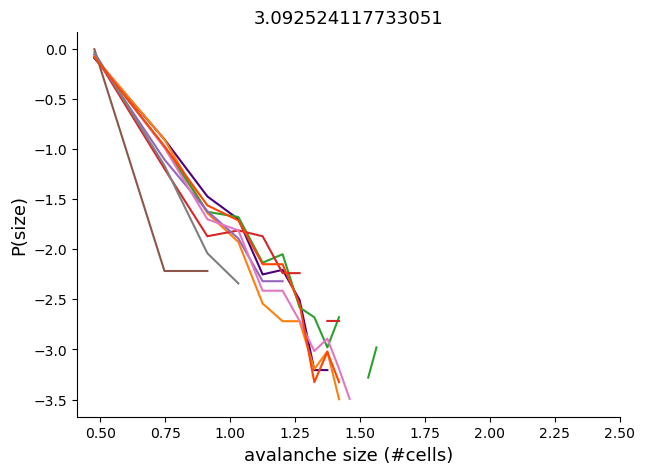

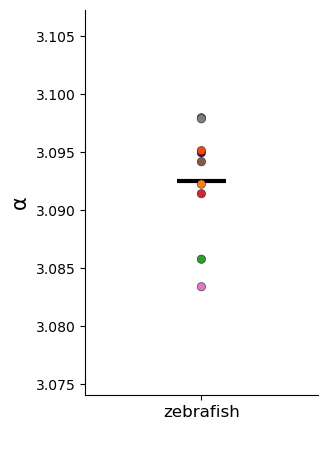

In [89]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
#EXPONENT CALCULATION - Baseline append
blnexp = blnsize_exp_list
#Make fish name list
fli=list(range(len(blnexp)))      
for i in range(len(blnexp)):
    fli[i] = 'F' + str(i)

slopedic = {
  "α": blnexp, "Fish": fli,  "condition": adfn.repeat_list('baseline',len(blnexp))}
bln_size_slopedf = pd.DataFrame(slopedic)


colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 30)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(blnexp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 2.5)  
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=bln_size_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(bln_size_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
#plt.ylim(1,5)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

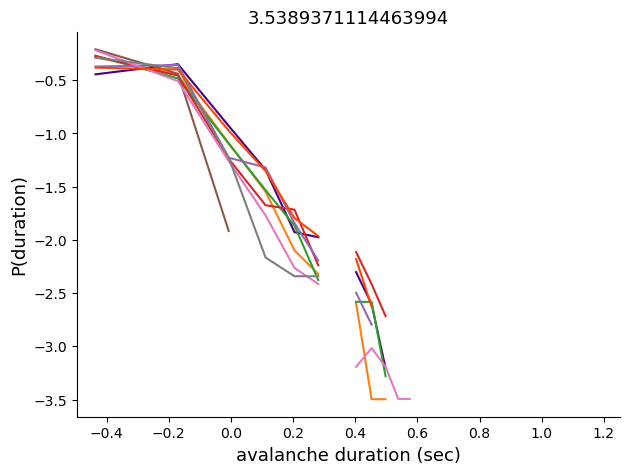

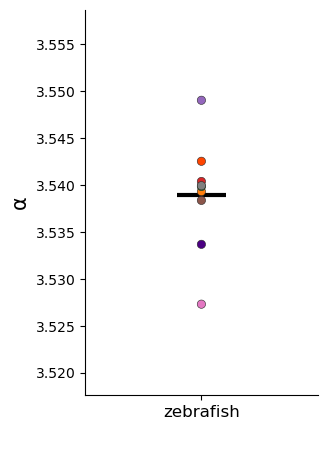

In [90]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sns.reset_orig()

#EXPONENT CALCULATION - Baseline append

#EXPONENT CALCULATION - Baseline append
blnexp = blndur_exp_list
#Make fish name list
fli=list(range(len(blnexp)))      
for i in range(len(blnexp)):
    fli[i] = 'F' + str(i)

slopedic = {
  "α": blnexp, "Fish": fli,  "condition": adfn.repeat_list('baseline',len(blnexp))}
bln_dur_slopedf = pd.DataFrame(slopedic)


binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(blnexp)), size = '13')
plt.xlim(right = 1.25)  
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=bln_dur_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(bln_dur_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
#plt.ylim(1,5)
plt.show()

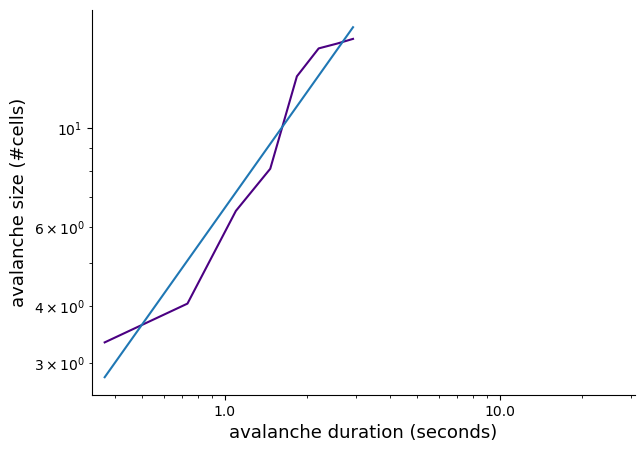

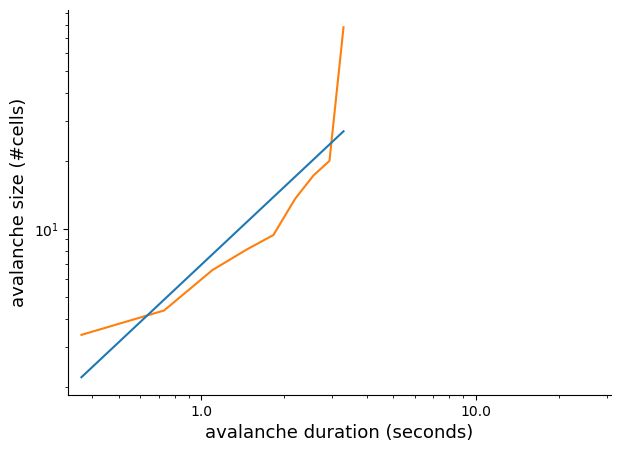

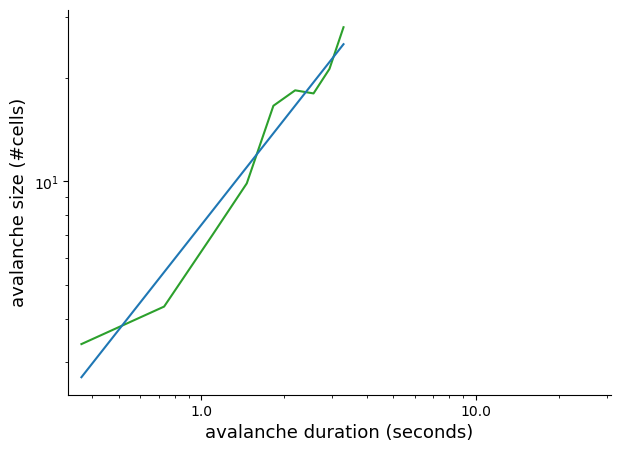

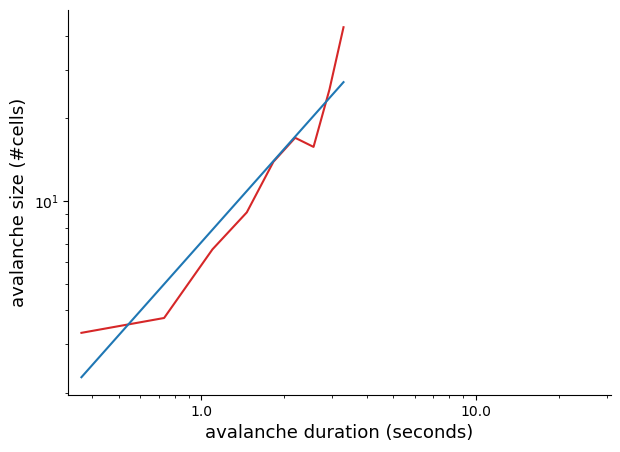

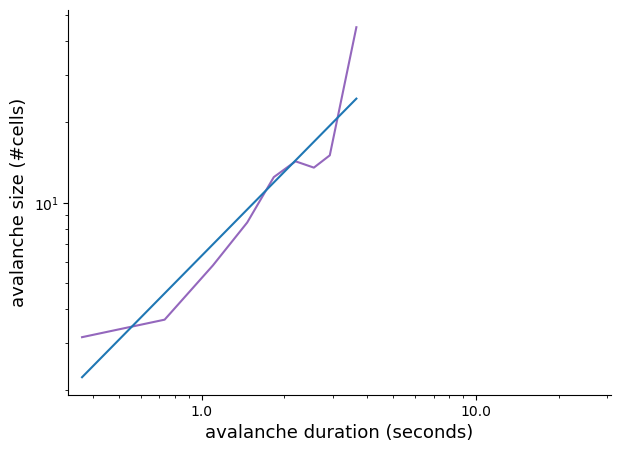

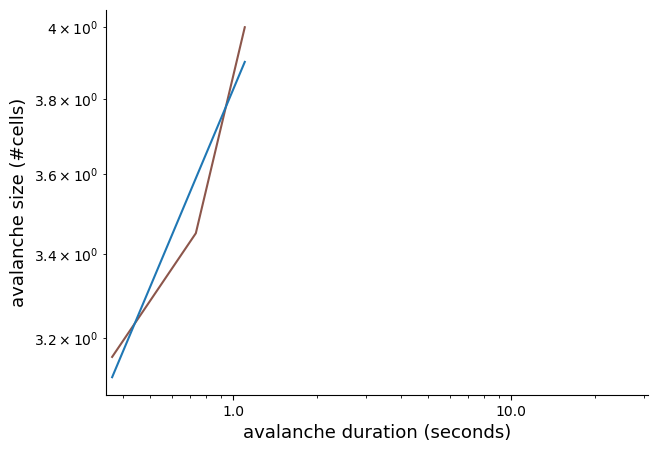

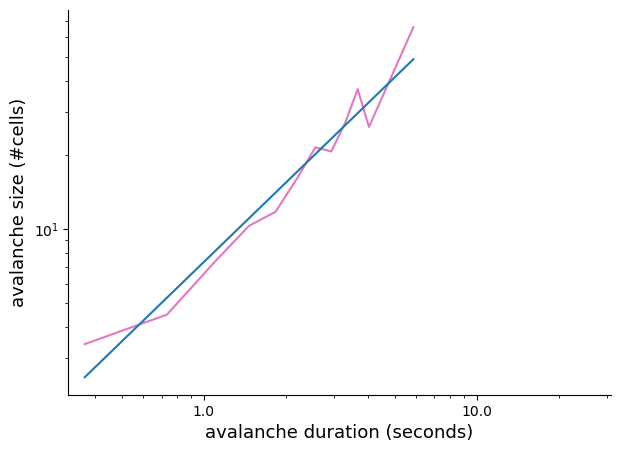

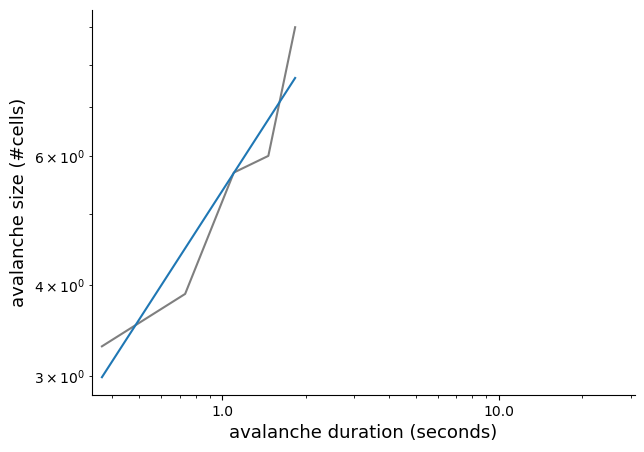

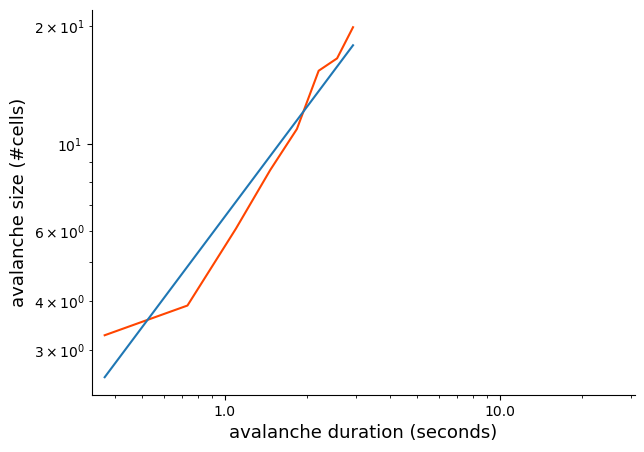

In [91]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))
bln_fit = list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
    y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
    bln_fit[i] = m

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.set_ylabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.xlim(right = 31)  
    plt.show()


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

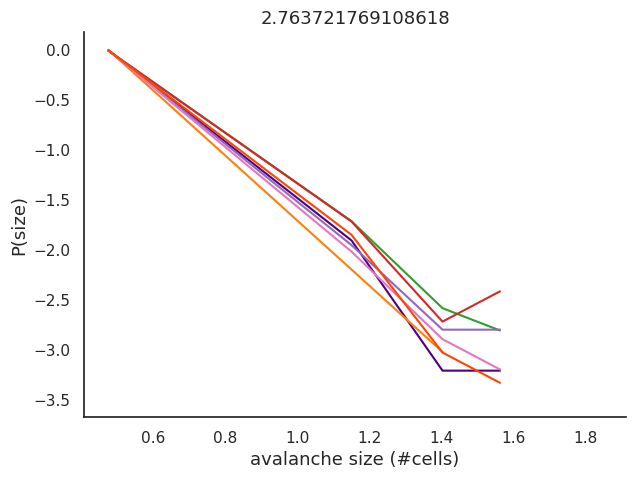

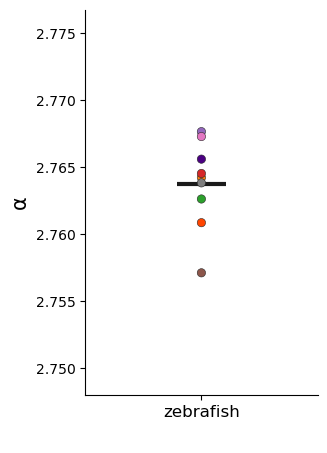

In [104]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
#EXPONENT CALCULATION - Baseline append
preexp = presize_exp_list
#Make fish name list
fli=list(range(len(preexp)))      
for i in range(len(preexp)):
    fli[i] = 'F' + str(i)

slopedic = {
  "α": preexp, "Fish": fli,  "condition": adfn.repeat_list('seizure',len(preexp))}
pre_size_slopedf = pd.DataFrame(slopedic)


colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(prelist)):
    binvec = np.append(binvec, np.load(prelist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 100)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(preexp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.xlim(right = 2.5)  
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=pre_size_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(pre_size_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
#plt.ylim(1,5)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

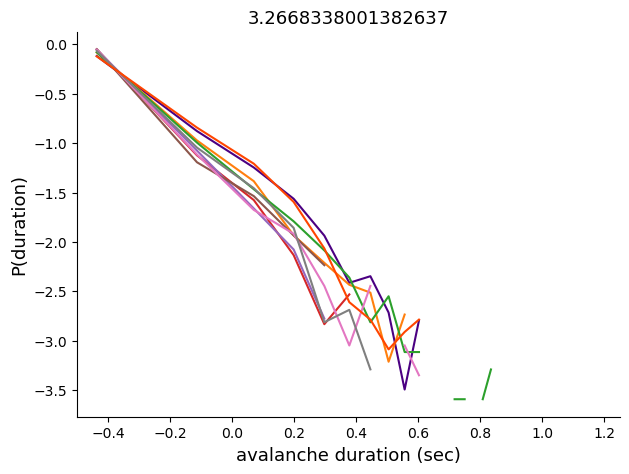

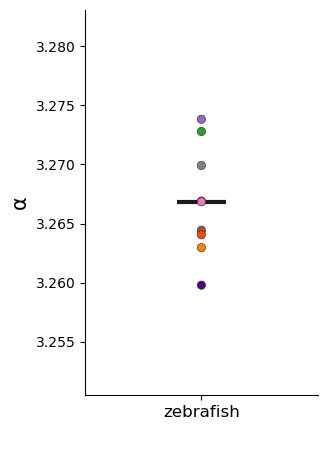

In [105]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sns.reset_orig()

#EXPONENT CALCULATION - Baseline append

#EXPONENT CALCULATION - Baseline append
preexp = predur_exp_list
#Make fish name list
fli=list(range(len(preexp)))      
for i in range(len(preexp)):
    fli[i] = 'F' + str(i)

slopedic = {
  "α": preexp, "Fish": fli,  "condition": adfn.repeat_list('seizure',len(preexp))}
pre_dur_slopedf = pd.DataFrame(slopedic)


binvec = []
for i in range(len(prelist)):
    binvec = np.append(binvec, (1/2.73)*np.load(prelist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(prelist[i])[1]
    binned=np.linspace(mini,maxi, 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(preexp)), size = '13')
plt.xlim(right = 1.25)  
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=pre_dur_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(pre_dur_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
#plt.ylim(1,5)
plt.show()

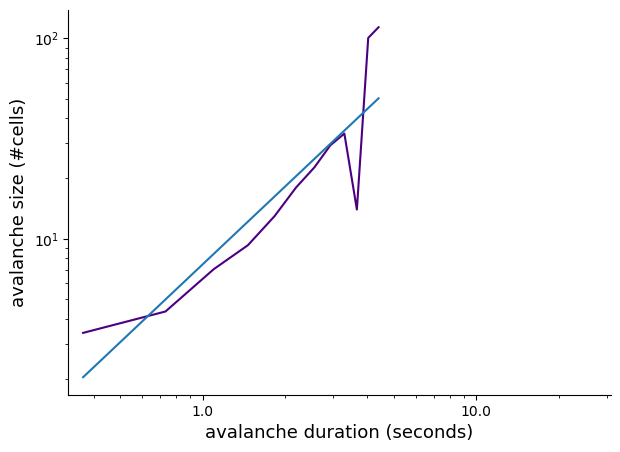

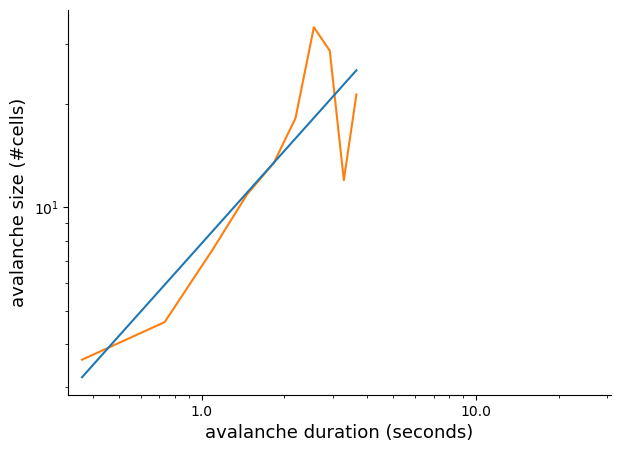

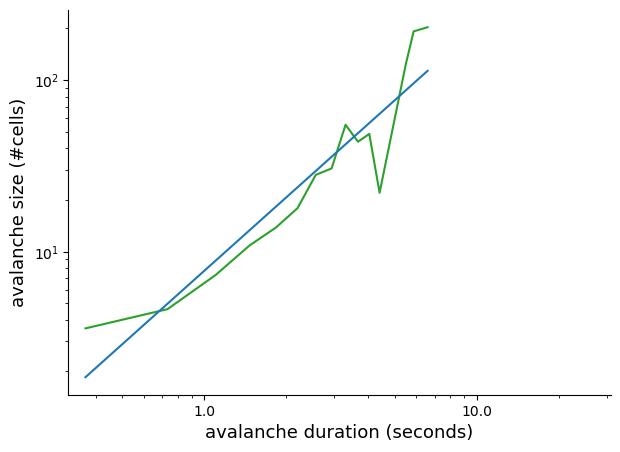

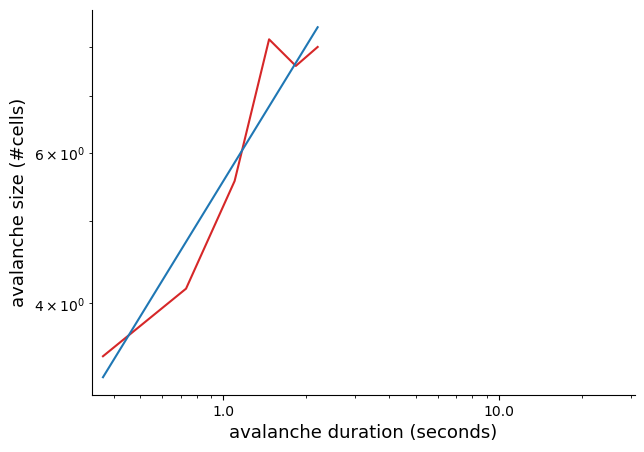

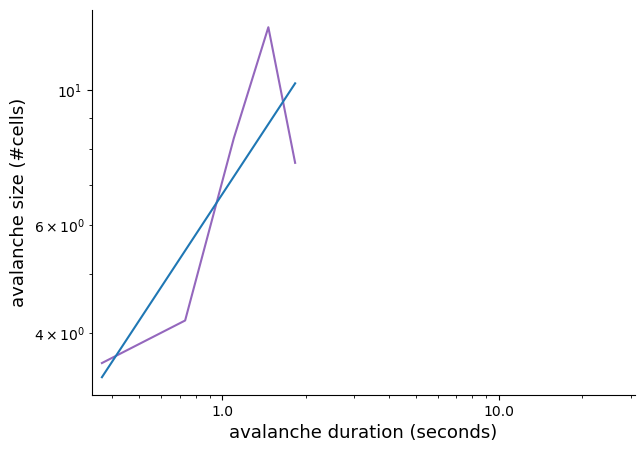

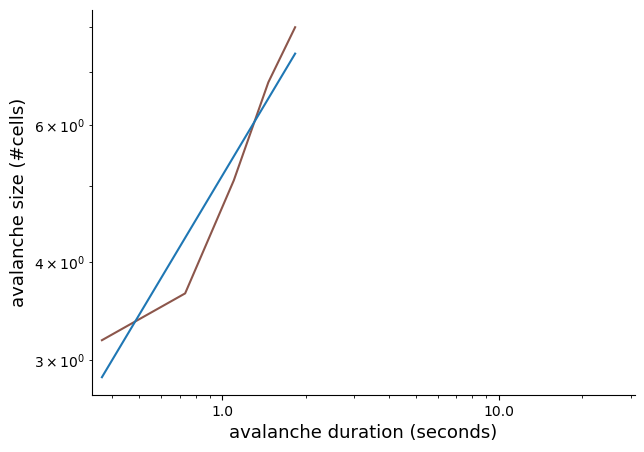

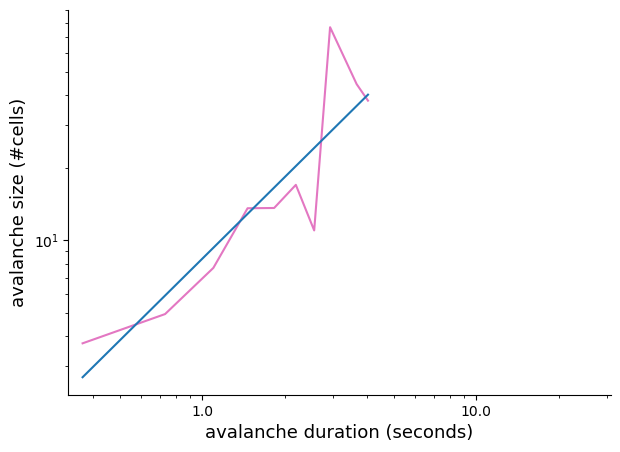

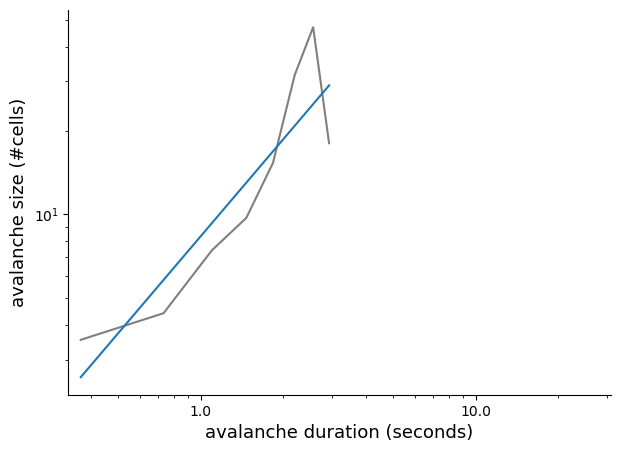

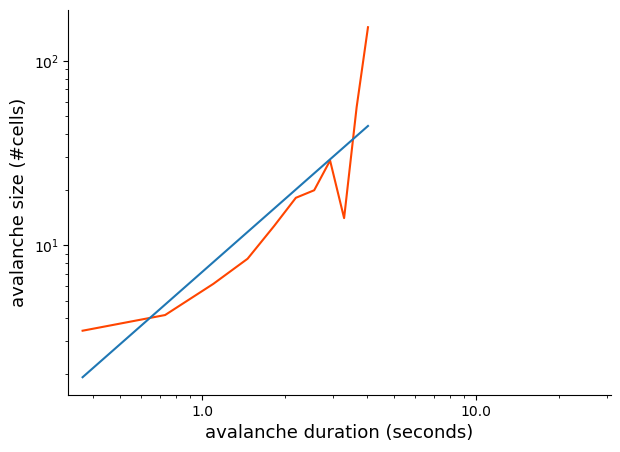

In [106]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sizelist, durlist = list(range(len(prelist))),list(range(len(prelist)))
pre_fit = list(range(len(prelist)))

for i in range(len(prelist)):    
    avsize = np.load(prelist[i])[0]
    avdur = (1/2.73)*np.load(prelist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
    y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
    pre_fit[i] = m

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.set_ylabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.xlim(right = 31)  
    plt.show()


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

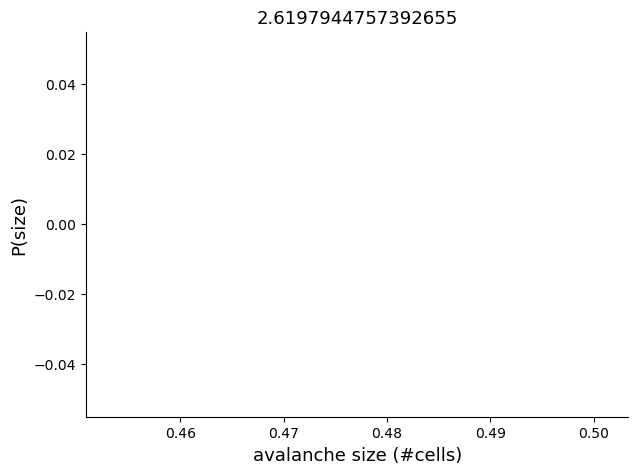

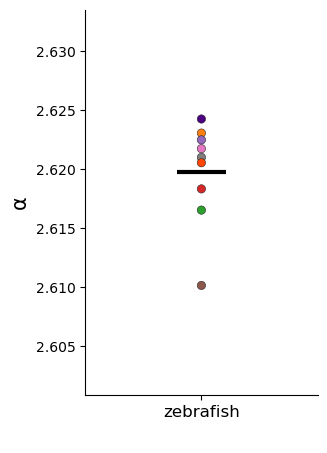

In [93]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
#EXPONENT CALCULATION - Baseline append
p20exp = p20size_exp_list
#Make fish name list
fli=list(range(len(p20exp)))      
for i in range(len(p20exp)):
    fli[i] = 'F' + str(i)

slopedic = {
  "α": p20exp, "Fish": fli,  "condition": adfn.repeat_list('seizure',len(p20exp))}
p20_size_slopedf = pd.DataFrame(slopedic)


colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(p20list)):
    binvec = np.append(binvec, np.load(p20list[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 100)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(p20exp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.xlim(right = 2.5)  
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=p20_size_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(p20_size_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
#plt.ylim(1,5)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

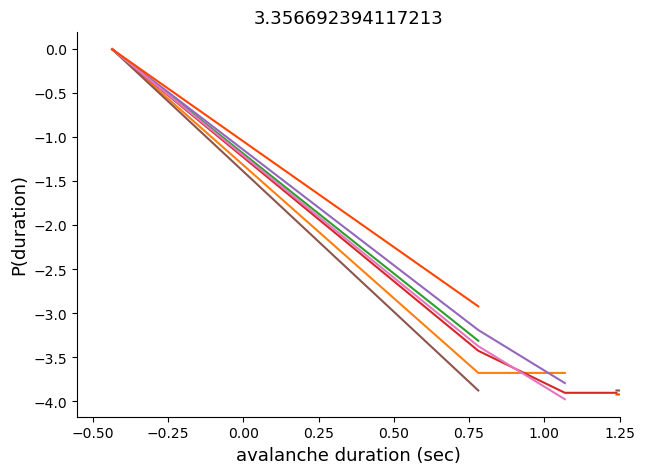

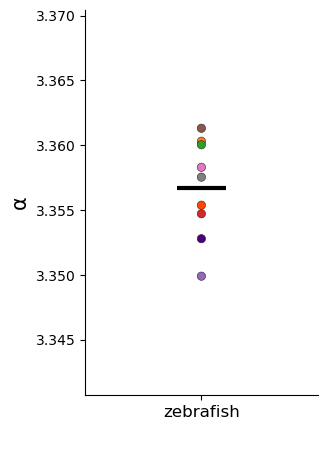

In [94]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sns.reset_orig()

#EXPONENT CALCULATION - Baseline append

#EXPONENT CALCULATION - Baseline append
p20exp = p20dur_exp_list
#Make fish name list
fli=list(range(len(p20exp)))      
for i in range(len(p20exp)):
    fli[i] = 'F' + str(i)

slopedic = {
  "α": p20exp, "Fish": fli,  "condition": adfn.repeat_list('seizure',len(p20exp))}
p20_dur_slopedf = pd.DataFrame(slopedic)


binvec = []
for i in range(len(p20list)):
    binvec = np.append(binvec, (1/2.73)*np.load(p20list[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(p20list[i])[1]
    binned=np.linspace(mini,maxi, 20)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(p20exp)), size = '13')
plt.xlim(right = 1.25)  
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=p20_dur_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(p20_dur_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
#plt.ylim(1,5)
plt.show()

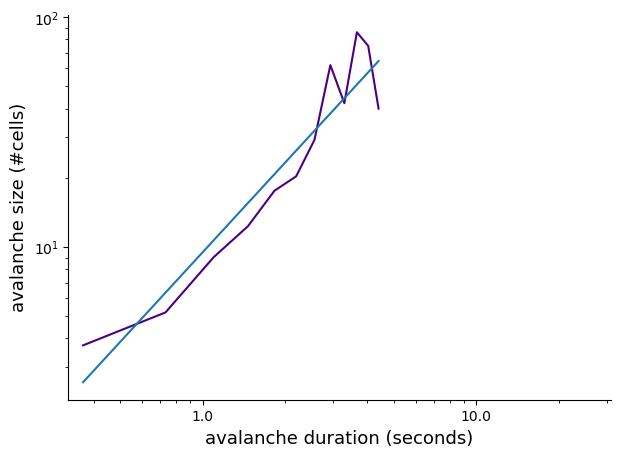

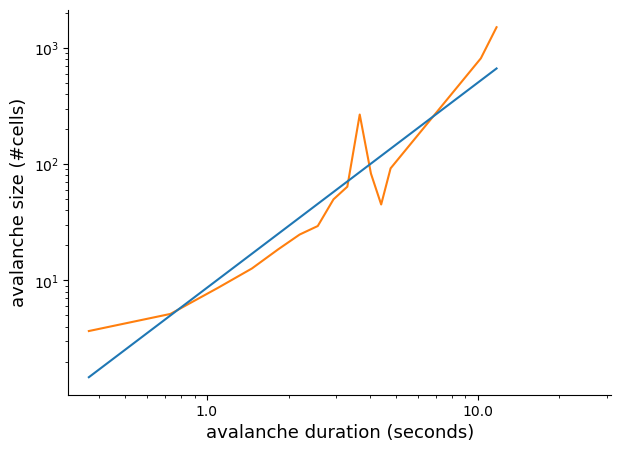

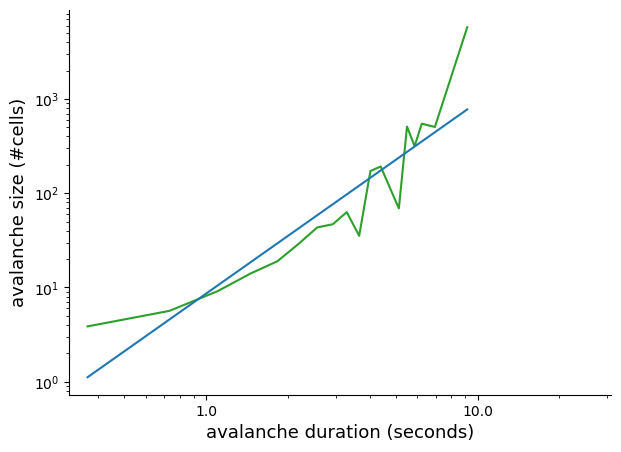

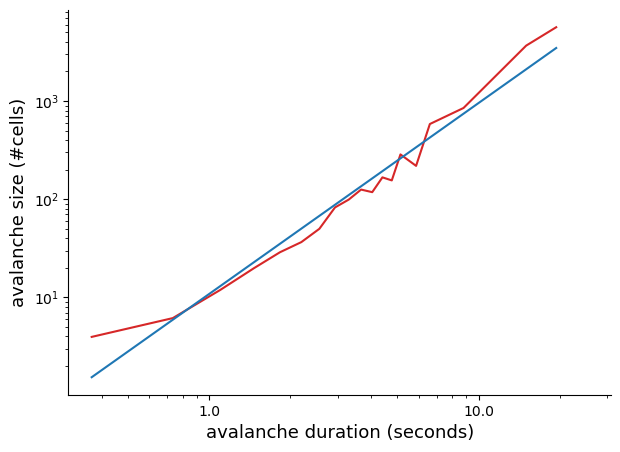

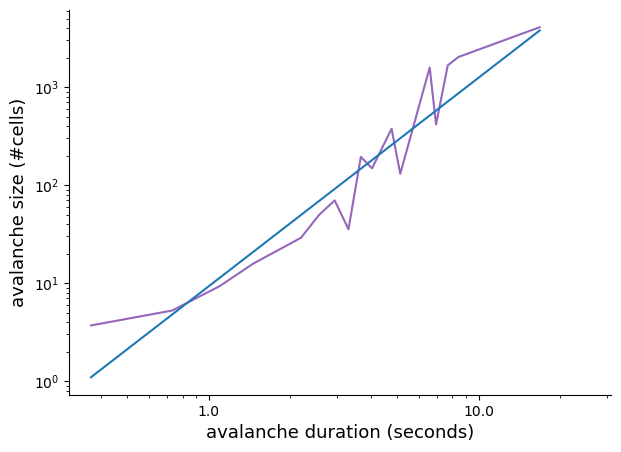

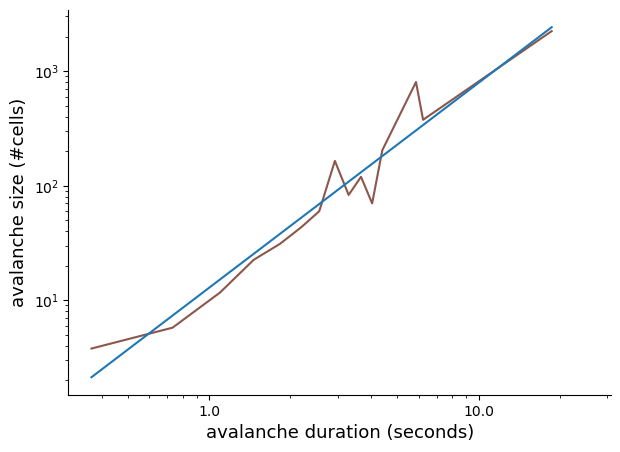

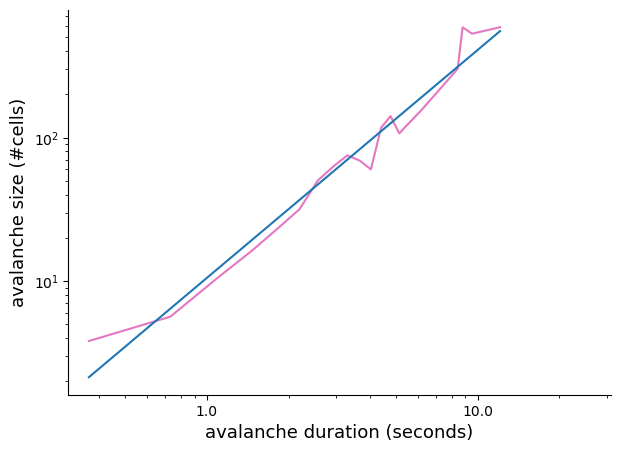

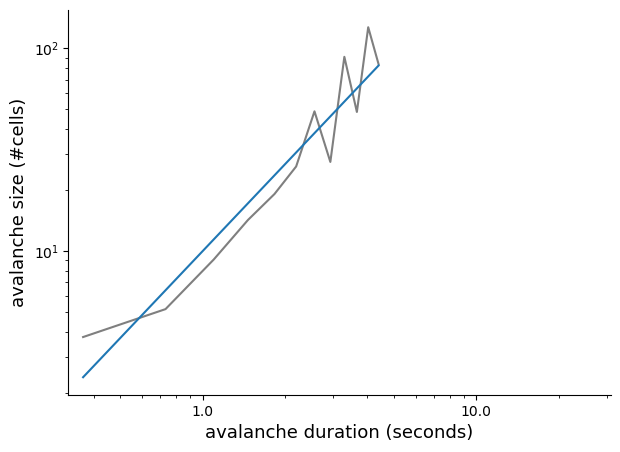

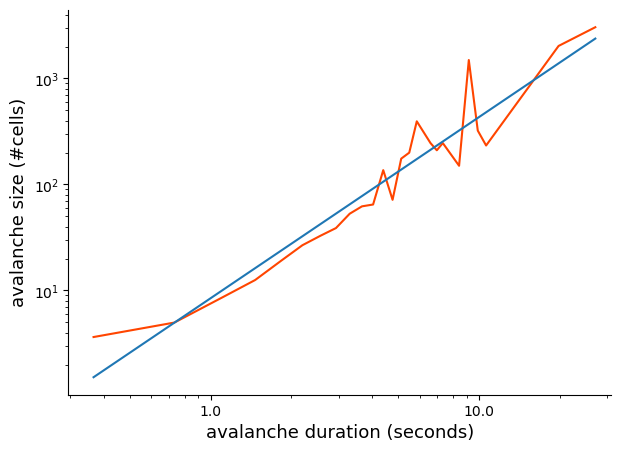

In [95]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sizelist, durlist = list(range(len(p20list))),list(range(len(p20list)))
p20_fit = list(range(len(p20list)))

for i in range(len(p20list)):    
    avsize = np.load(p20list[i])[0]
    avdur = (1/2.73)*np.load(p20list[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
    y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
    p20_fit[i] = m

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.set_ylabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.xlim(right = 31)  
    plt.show()


In [96]:
def DCC(dur, size):
    Beta = (dur - 1)/(size - 1)
    return(Beta)

In [107]:
bln_pred = []
dur = bln_dur_slopedf['α']
size = bln_size_slopedf['α']
for i in range(len(dur)):
    bln_pred = np.append(DCC(dur[i], size[i]), bln_pred)
bln_diff = abs(bln_fit - bln_pred)
bln_diff

pre_pred = []
dur = pre_dur_slopedf['α']
size = pre_size_slopedf['α']
for i in range(len(dur)):
    pre_pred = np.append(DCC(dur[i], size[i]), pre_pred)
pre_diff = abs(pre_fit - pre_pred)

p20_pred = []
dur = p20_dur_slopedf['α']
size = p20_size_slopedf['α']
for i in range(len(dur)):
    p20_pred = np.append(DCC(dur[i], size[i]), p20_pred)
p20_diff = abs(p20_fit - p20_pred)

In [98]:
bln_diff

array([0.35118386, 0.07095304, 0.20143512, 0.08504393, 0.17749127,
       1.00862545, 0.14614197, 0.62769849, 0.2751684 ])

In [108]:
pre_diff

array([0.00352046, 0.39242122, 0.13993735, 0.76090344, 0.59588935,
       0.69134456, 0.16393614, 0.12173712, 0.02906856])

In [99]:
p20_diff

array([0.15854636, 0.30904969, 0.57783157, 0.47839486, 0.67946913,
       0.33439267, 0.12813955, 0.02962304, 0.26038691])

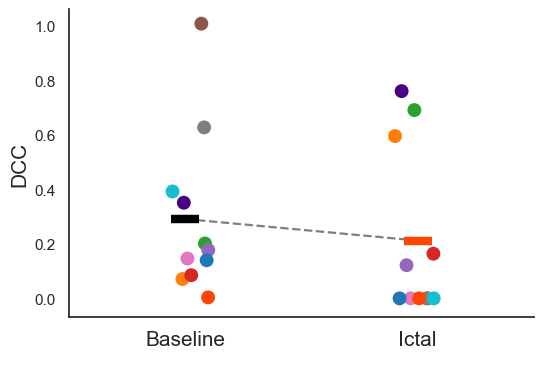

In [112]:
#SIZE - KS
listlist = [bln_diff, pre_diff]
dcc = np.zeros((22))
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)
    
listlist = [bln_diff, pre_diff]
    
dccdf = {}
count=0
for i in range(len(listlist)):
    for y in range(8):
        dcc[count] = listlist[i][y]
        count+=1
dcc_pd = pd.DataFrame({"DCC": dcc , "Labels":  np.append(adfn.repeat_list('Baseline',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="DCC", data = dcc_pd, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="DCC", data=dcc_pd, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="DCC", data=dcc_pd, hue = 'Fish', palette = colors1, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '15')
ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
plt.show()

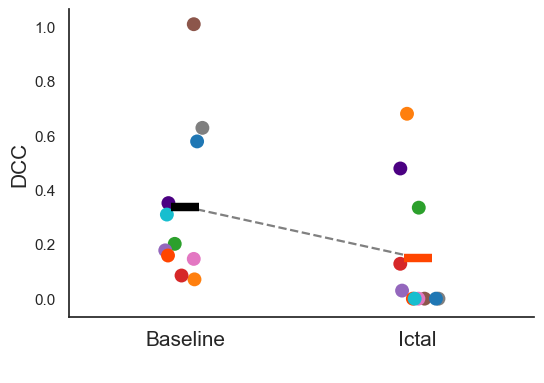

In [103]:
#SIZE - KS
listlist = [bln_diff, p20_diff]
dcc = np.zeros((22))
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)
    
listlist = [bln_diff, p20_diff]
    
dccdf = {}
count=0
for i in range(len(listlist)):
    for y in range(8):
        dcc[count] = listlist[i][y]
        count+=1
dcc_pd = pd.DataFrame({"DCC": dcc , "Labels":  np.append(adfn.repeat_list('Baseline',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="DCC", data = dcc_pd, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="DCC", data=dcc_pd, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="DCC", data=dcc_pd, hue = 'Fish', palette = colors1, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '15')
ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
plt.show()

### Power law quantification
* duration and size of avalanches are better explained by power laws than lognormal

In [93]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
size_powlist = sorted(glob.glob('*BLN*size*_power*'))
size_loglist = sorted(glob.glob('*BLN*size*_log*'))
dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))
dur_loglist = sorted(glob.glob('*BLN*dur*_log*'))
size_powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_size_marglik_power.npy']

In [158]:
#LOGLIK RATIO
size_list, dur_list = np.zeros(11), np.zeros(11)


for i in range(len(size_powlist)):
    size_list[i] =  np.load(size_powlist[i],allow_pickle=True)[1] - np.load(size_loglist[i],allow_pickle=True)[2]
    #dur_list[i] = np.load(dur_powlist[i],allow_pickle=True)[1] - np.load(dur_loglist[i],allow_pickle=True)[2]
fli = list(range(11))
for i in range(11):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":size_list ,"Fish": fli, "Labels": adfn.repeat_list('Size', 11)})

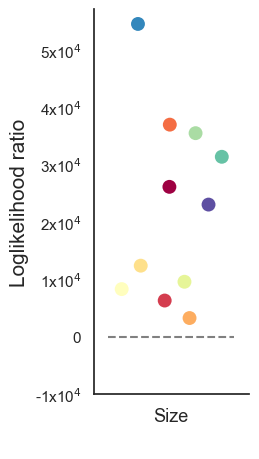

In [180]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
sns.set(style="white")
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 10, jitter = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Size'], size = 13)
plt.hlines(1, -0.1 ,0.1, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
plt.savefig('llr_size.svg', transparent = True)
plt.show()

In [181]:
#LOGLIK RATIO
size_list, dur_list = np.zeros(11), np.zeros(11)


for i in range(len(size_powlist)):
    dur_list[i] = np.load(dur_powlist[i],allow_pickle=True)[1] - np.load(dur_loglist[i],allow_pickle=True)[2]
fli = list(range(11))
for i in range(11):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":dur_list ,"Fish": fli, "Labels": adfn.repeat_list('Size', 11)})

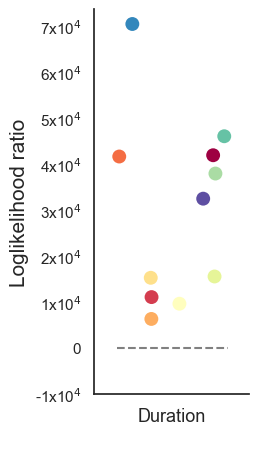

In [182]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
sns.set(style="white")
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 10, jitter = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Duration'], size = 13)
plt.hlines(1, -0.1 ,0.1, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
plt.savefig('llr_dur.svg', transparent = True)
plt.show()

# Connectivity-distance
* np.corrcoeff function for entire matrix 
* bin data on linear scale 
* ignore negative correlations
* exponent match theory

In [12]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('*BLN*cut*realtrace*')) 
coordlist = sorted(glob.glob('*BLN*realcoord*')) 
distlist = sorted(glob.glob('*BLN*dist.npy*')) 
binlist = sorted(glob.glob('*BLN*_corrdist*'))
binlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_corrdist_bins.npy']

In [ ]:
#Calculate euclidean distance
#for e in range(len(coordlist)):
#    euc_mat = crfn.euclidean_mat(np.load(coordlist[e]), [.5, .5, 15])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, coordlist) + '_' + 'dist.npy', mat)
#    print('Done fish #' + str(e))

In [ ]:
#Calculate corr-dist binning
#for e in range(len(distlist)):
#    corr = np.corrcoef(np.load(tracelist[e]))
#    np.save(savepath + adfn.save_name(e,tracelist) + '_' + 'corr.npy', corr)
#    corrdistbin = crfn.corrdis_bin(corr, np.load(distlist[e]), distlist[e], 200)
#    np.save(savepath + adfn.save_name(e,distlist) + '_' + 'corrdist_bins.npy', corrdistbin)

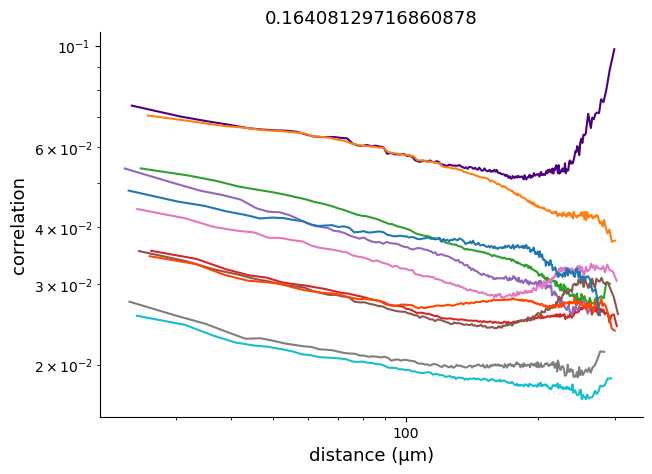

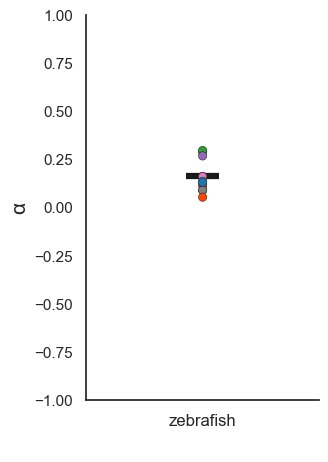

In [13]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = np.load(binlist[i])[0]
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.set_title(str(np.mean(slope)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(-1,1)
plt.show()

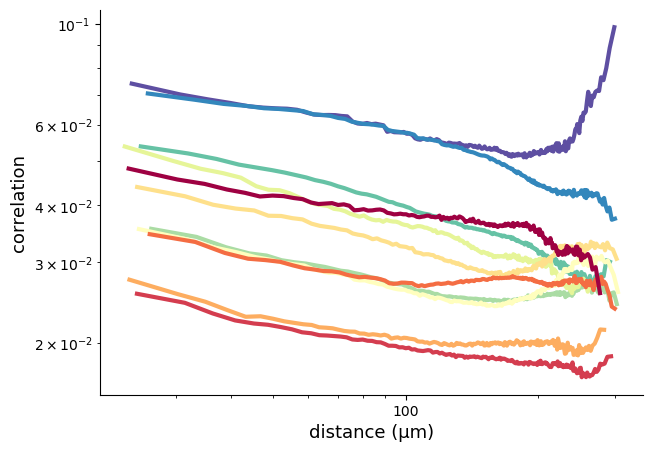

In [20]:
import matplotlib
from matplotlib import cm

colors  = cm.Spectral_r(np.linspace(0,1,len(binlist)))
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = np.load(binlist[i])[0]
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 3, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('fcd.svg', transparent = True)
plt.show()

# Eigenspectrum
* Baseline PCA variance plots - exponent calculation
* behaviour PCA variance

In [3]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
blnpcv

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_pcavar.npy']

In [ ]:
#Calculate entire trace PC-variance
#blnpcv, p20pcv = list(range(len(blnraw))),list(range(len(p20raw)))
#for e in range(len(blnraw)):
#    b_data, p_data = np.load(blnraw[e]), np.load(p20raw[e])
#    n_components = b_data.shape[1]
#    b_pca, p_pca = decomposition.PCA(n_components) ,decomposition.PCA(n_components) #Define decomposition
#    b_fit, p_fit = b_pca.fit(b_data) ,p_pca.fit(p_data) 
#    blnpcv[e], p20pcv[e] = b_fit.explained_variance_ratio_, p_fit.explained_variance_ratio_
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, blnraw) + '_' + 'pcavar.npy', blnpcv[e])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p20raw)  + '_' + 'pcavar.npy', p20pcv[e])
#    print('Saved fish #' + str(e))

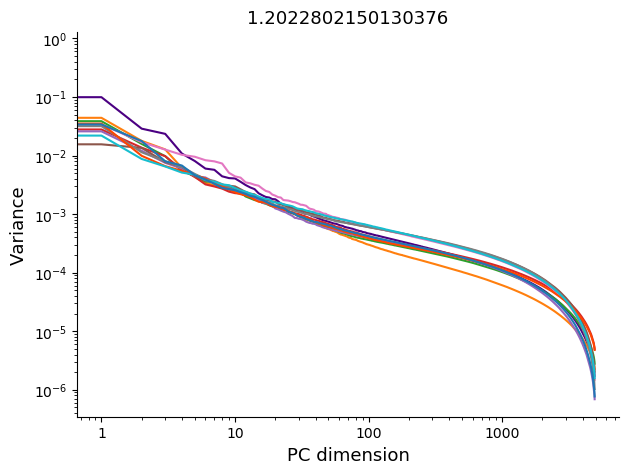

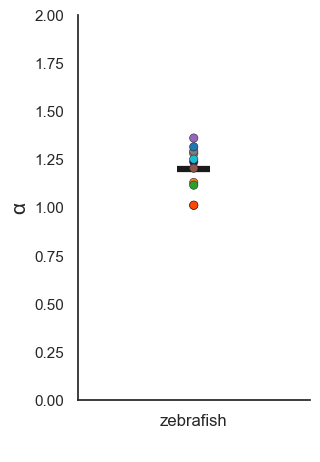

In [184]:
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
slope = list(range(len(blnpcv)))
for i in range(len(blnpcv)):
    xaxis = np.linspace(0,np.shape(np.load(blnpcv[i]))[0], num = np.shape(np.load(blnpcv[i]))[0]+1)
    yaxis = np.load(blnpcv[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(slope)), size = '13')
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(0,2)
plt.show()


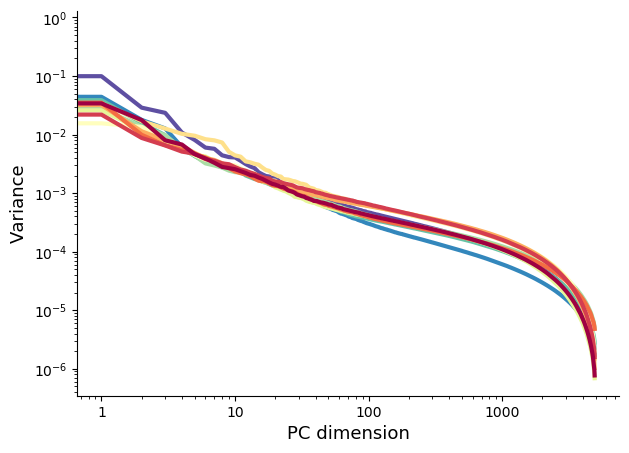

In [190]:
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
slope = list(range(len(blnpcv)))
for i in range(len(blnpcv)):
    xaxis = np.linspace(0,np.shape(np.load(blnpcv[i]))[0], num = np.shape(np.load(blnpcv[i]))[0]+1)
    yaxis = np.load(blnpcv[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 3, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('eigspec.svg', transparent = True)
plt.show()


In [4]:
blnpcv

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_pcavar.npy']

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


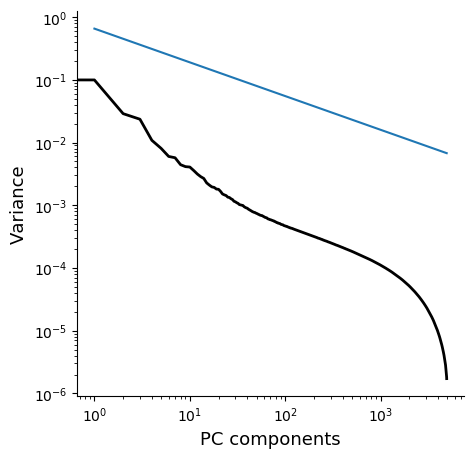

-1.2385028567840863 -0.4245119070803723


(0.7000335601977256, 0.0)

In [10]:
fig, axarr = plt.subplots(figsize = (5,5))
data = np.load(blnpcv[0])
xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
yaxis = data
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = 'k')

m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
y_fit = np.exp(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()
print(m,c)
from scipy import stats
stats.pearsonr(yaxis[1:], y_fit[1:])

In [11]:
y_fit

array([       inf, 0.65408896, 0.45052648, ..., 0.00676471, 0.00676397,
       0.00676323])

In [ ]:
for i in range(len(blnpcv)):
    
    fig, axarr = plt.subplots(figsize = (5,5))
    data = np.load(blnpcv[0])
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = 'k')

    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
    y_fit = np.exp(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 


# Branching ratio
* branching ratio is close to critical value (1)

In [21]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*_branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*_branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*_branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [22]:
import pandas as pd
all_list = [blnbranchlist]
blist = adfn.list_of_list(1,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

branchdic = {
  "branch ratio": blist[0], "condition": adfn.repeat_list('baseline',11), "Fish": fli}
branchdf = pd.DataFrame(branchdic)
branchdf

,branch ratio,condition,Fish
0,0.986667,baseline,F2
1,1.089033,baseline,F3
2,1.020179,baseline,F4
3,1.033049,baseline,F5
4,0.838542,baseline,F6
5,0.883468,baseline,F7
6,0.906975,baseline,F8
7,0.797831,baseline,F9
8,1.017794,baseline,F10
9,0.862305,baseline,F11


In [23]:
np.mean(branchdf['branch ratio'])

0.9453961035905333

In [24]:
from scipy import stats
stats.sem(branchdf['branch ratio'])

0.028056533616139176

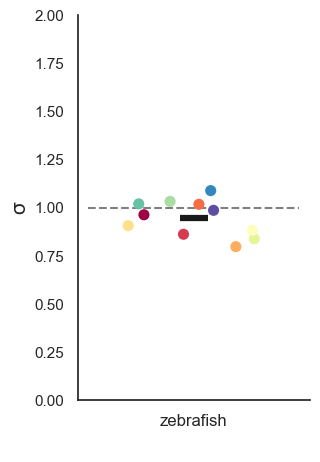

In [152]:
import matplotlib 
import seaborn as sns
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish',palette = colors, jitter = True, size = 8, alpha = 1)
plt.hlines(np.mean(branchdf['branch ratio']), -0.02 ,0.02, linestyle = '-', color = 'k', lw=4.5)
plt.hlines(1, -0.15 ,0.15, linestyle = '--', color = 'grey')
ax.set_ylabel('σ', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
plt.ylim(0,2)
ax.legend_.remove()
plt.savefig('BR_baseline.svg', transparent = True)
plt.show()